In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from taskdataset import TaskDataset
import torchvision
import cv2

path_to_data = "datasets/ModelStealingPub.pt" # TODO Set path to datasets files

# import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

In [2]:
dataset = torch.load(path_to_data)

# lenght = len(dataset)
length = 100

for i in range(length):
    el = [dataset.ids[i], np.array(dataset.imgs[i]), dataset.labels[i]]

    if el[1].shape != (32, 32, 3):
        #convert to RGB
        el[1] = cv2.cvtColor(el[1], cv2.COLOR_GRAY2RGB)
        #convert to tensor
        dataset.imgs[i] = torch.from_numpy(el[1])
    else:
        #convert to tensor
        dataset.imgs[i] = torch.from_numpy(el[1])

dataset2 = []
for i in range(length):
    I = dataset.imgs[i].to(torch.float32) / 255
    label = np.random.rand(512)
    el = [I.reshape(3*32*32), label.astype(np.float32)]
    dataset2.append(el)



In [12]:
dataset = torch.load(path_to_data)

# lenght = len(dataset)
length = 100

for i in range(length):
    image = np.array(dataset.imgs[i])


    if image.shape != (32, 32, 3):
        #convert to RGB
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    #convert to tensor
    image = torch.from_numpy(image)

    image = image.to(torch.float32) / 255


# dataset2 = []
# for i in range(length):
#     I = dataset.imgs[i].to(torch.float32) / 255
#     label = np.random.rand(512)
#     el = [I.reshape(3*32*32), label.astype(np.float32)]
#     dataset2.append(el)



In [3]:
print(type(dataset2[1][0]))
print(type(dataset2[1][1]))
print(type(dataset2[1][1][0]))
print(dataset2[1][1].shape)
len(dataset2)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
<class 'numpy.float32'>
(512,)


100

In [4]:
loader = torch.utils.data.DataLoader(dataset = dataset2,
                                     batch_size = 32,
                                     shuffle = True)
len(loader)

4

In [5]:
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()
         
        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            
            torch.nn.Linear(3 * 32 * 32, 1536),
            torch.nn.ReLU(),
            torch.nn.Linear(1536, 1536),
            torch.nn.ReLU(),
            torch.nn.Linear(1536, 512),
            # torch.nn.ReLU(),
            # torch.nn.Linear(36, 18),
            
        )
         
 
    def forward(self, x):
        encoded = self.encoder(x)
        encoded.double()
        return encoded

In [6]:
# Model Initialization
model = AE()
 
# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()
 
# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 1e-1,
                             weight_decay = 1e-8)

In [7]:
epochs = 10
outputs = []
losses = []
all_losses = []


for epoch in range(epochs):

    for (image, labels) in loader:

      # Output of Autoencoder
      features = model(image)

      # Calculating the loss function
      loss = loss_function(features, labels)
       
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
       
      # Storing the losses in a list for plotting
      losses.append(float(loss))
    outputs.append((epochs, image, features))
    all_losses.append(np.average(losses))



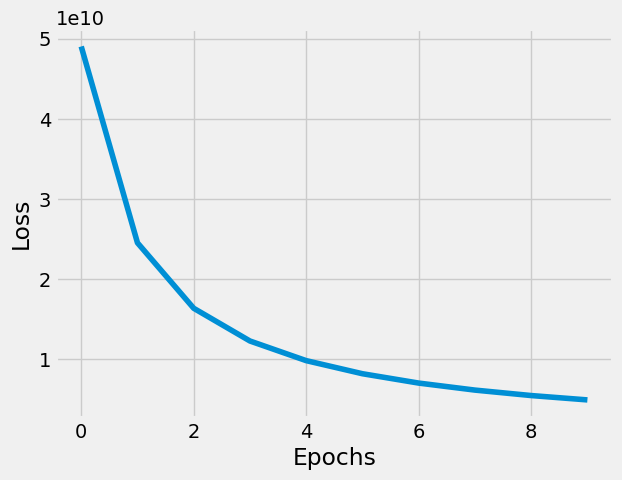

In [8]:

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# losses2 = np.array(losses2)
 
# Plotting the last 100 values
plt.plot(all_losses)
# losses